In [4]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit_aer import AerSimulator
from utils import get_image_path

In [2]:
def simulate(qc, backend=AerSimulator(), shots=1000):
    transpiled_qc = transpile(qc, backend)
    return backend.run(transpiled_qc, shots=shots).result()

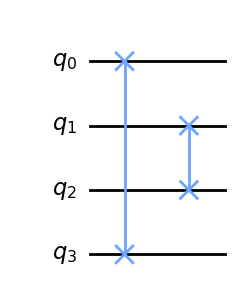

In [5]:
oracle_swap = QuantumCircuit(4)
oracle_swap.swap(0, -1)
oracle_swap.swap(1, -2)
oracle_swap.draw('mpl', filename=get_image_path("minimal-oracle.png"))

In [13]:
oracle_copy = oracle_swap.copy()
oracle_copy.save_unitary()
unitary = simulate(oracle_copy).get_unitary()
array_to_latex(unitary, max_size=10000)

<IPython.core.display.Latex object>

In [24]:
oracle = oracle_swap.to_gate(label="$oracle_{Swap}$")

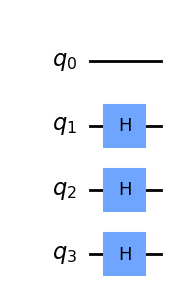

In [73]:
qc = QuantumCircuit(4)
qc.h(range(1, 4))
qc.draw('mpl')

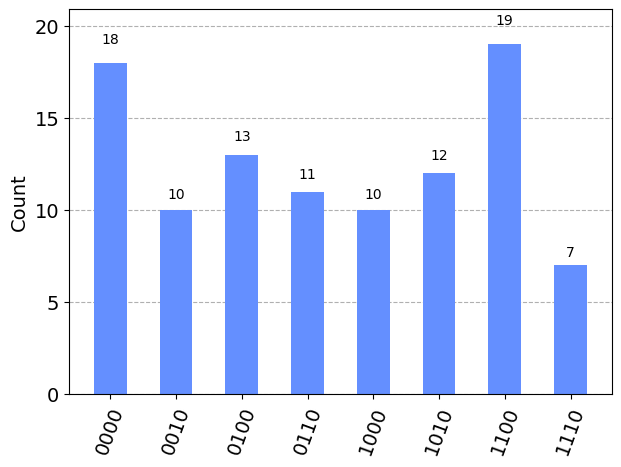

In [74]:
qc_copy = qc.copy()
qc_copy.measure_all()
plot_histogram(simulate(qc_copy, shots=100).get_counts())

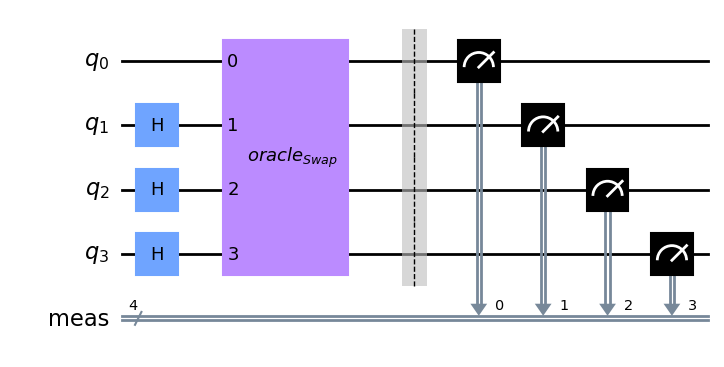

In [75]:
qc.append(oracle, range(4))
qc.measure_all()
qc.draw('mpl')

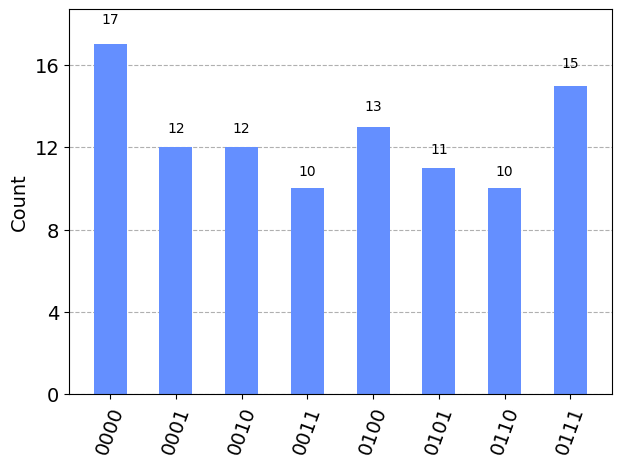

In [76]:
plot_histogram(simulate(qc, shots=100).get_counts())